In [2]:
import argparse
import os
import sys
import numpy as np

import torch
import matplotlib.pyplot as plt     # type: ignore

things_stim_path = '/user_data/mmhender/stimuli/things/'
save_stim_path1 = '/user_data/mmhender/stimuli/featsynth/images_v2'
save_stim_path2 = '/user_data/mmhender/stimuli/featsynth/images_v2_basic_prototypes'

sys.path.append('/user_data/mmhender/featsynth/texture_synthesis/code/')
import utilities

In [3]:
import pandas as pd

f1 = '/user_data/mmhender/featsynth/features/raw/images_ecoset64_list.csv'
d1 = pd.read_csv(f1)

In [4]:
import pandas as pd

f2 = '/user_data/mmhender/featsynth/features/raw/images_ecoset_list.csv'
d2 = pd.read_csv(f2)

In [6]:
np.all(d1==d2)

True

In [158]:
1440/28.5

50.526315789473685

In [159]:
682/16

42.625

In [ ]:
1128 x 2837

In [27]:
ecoset_path = '/lab_data/tarrlab/common/datasets/Ecoset/'
ecoset_info_path = '/user_data/mmhender/stimuli/ecoset_info/'
fn = os.path.join(ecoset_info_path, 'categ_use_ecoset.npy')
info = np.load(fn, allow_pickle=True).item()
basic_names = list(info['binfo'].keys())

In [28]:
# list of all files in each category
fn = os.path.join(ecoset_info_path, 'ecoset_file_info.npy')
efiles = np.load(fn, allow_pickle=True).item()


In [105]:
bi = 1;
bname = basic_names[bi]
im = 0;
imfiles_all = efiles[bname]['train']['images']
target_image_filename = os.path.join(ecoset_path,'train',\
                                                  info['binfo'][bname]['ecoset_folder'], \
                                                  imfiles_all[im]
                                                  ) 
target_image_filename

'/lab_data/tarrlab/common/datasets/Ecoset/train/0841_bee/n02207805_163.JPEG'

In [131]:
fn_list = ['/lab_data/tarrlab/common/datasets/Ecoset/train/0602_guitar/n02676566_9687.JPEG',
'/lab_data/tarrlab/common/datasets/Ecoset/train/0602_guitar/n03467517_13923.JPEG',
'/lab_data/tarrlab/common/datasets/Ecoset/train/0602_guitar/n02676566_5256.JPEG',
'/lab_data/tarrlab/common/datasets/Ecoset/train/0602_guitar/n03272010_1992.JPEG',
'/lab_data/tarrlab/common/datasets/Ecoset/train/0602_guitar/n03467517_21878.JPEG',
'/lab_data/tarrlab/common/datasets/Ecoset/train/0602_guitar/n03467517_6218.JPEG',
'/lab_data/tarrlab/common/datasets/Ecoset/train/0602_guitar/n03499907_7914.JPEG',
'/lab_data/tarrlab/common/datasets/Ecoset/train/0602_guitar/n02676566_6928.JPEG',
'/lab_data/tarrlab/common/datasets/Ecoset/train/0602_guitar/n02676566_8993.JPEG',
'/lab_data/tarrlab/common/datasets/Ecoset/train/0602_guitar/n03272010_11743.JPEG']

In [138]:
im_list = [PIL.Image.open(fn) \
           for fn in fn_list]
im_array_list = [np.reshape(np.array(im.getdata()), [im.size[1], im.size[0], 3]) \
                 for im in im_list]
im_array_list = [im_array.astype(np.float64)/255 \
                 for im_array in im_array_list]
im_tensor_list = [torch.Tensor(np.moveaxis(im_array, [2], [0])) \
                  for im_array in im_array_list]


In [139]:
im_tensor_list[0].shape

torch.Size([3, 334, 500])

In [117]:
target_image_filename = '/lab_data/tarrlab/common/datasets/Ecoset/train/0602_guitar/n02676566_9687.JPEG'

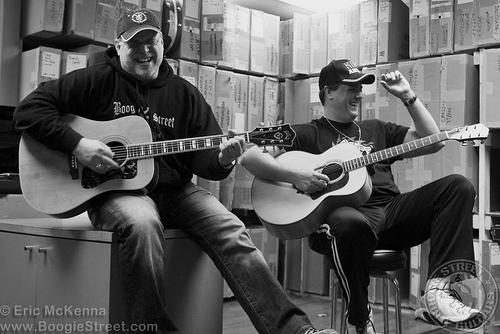

In [118]:
import PIL.Image
im = PIL.Image.open(target_image_filename)
im

In [119]:
im.size

(500, 334)

In [120]:
im_array = np.reshape(np.array(im.getdata()), [im.size[1], im.size[0], 3])
im_array = im_array.astype(np.float64)/255

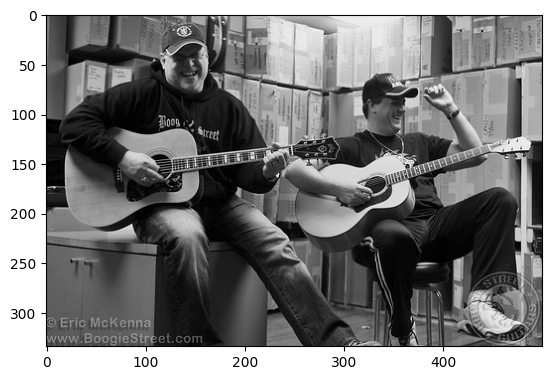

In [121]:
plt.figure()
plt.imshow(im_array)

In [122]:
im_tensor = torch.Tensor(np.moveaxis(im_array, [2], [0])[None,:,:,:])
im_tensor.shape

torch.Size([1, 3, 334, 500])

In [123]:
import torchvision
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_Weights
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=weights)

In [140]:
model.eval()
out = model(im_tensor_list)

/home/mmhender/imstat_env/lib/python3.7/site-packages/torchvision/utils.py:215: UserWarning: boxes doesn't contain any box. No box was drawn
  warnings.warn("boxes doesn't contain any box. No box was drawn")


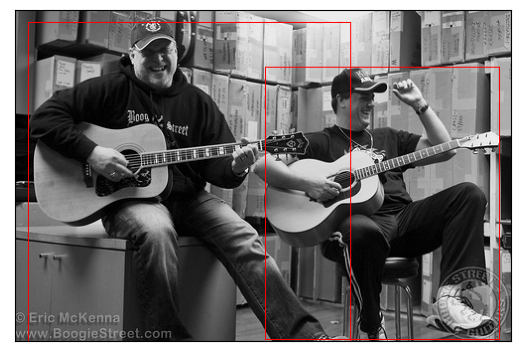

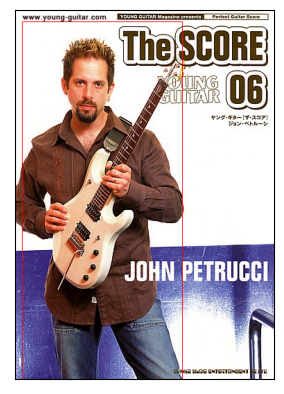

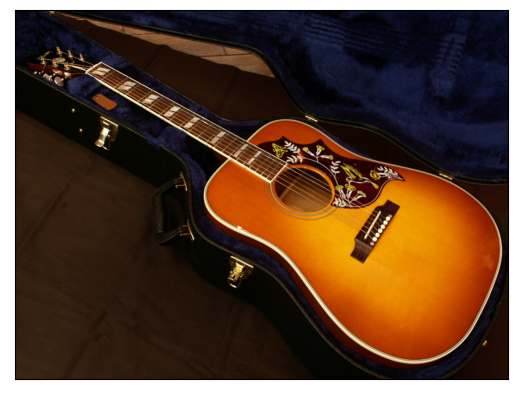

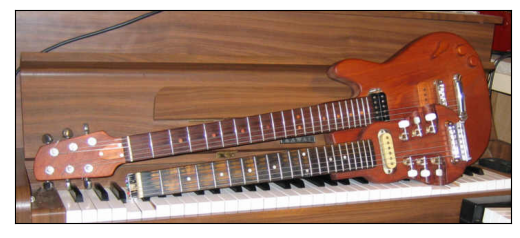

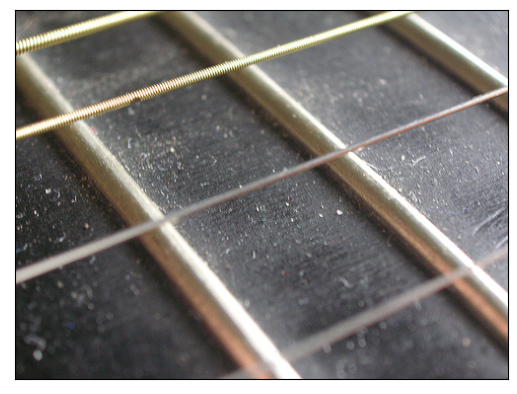

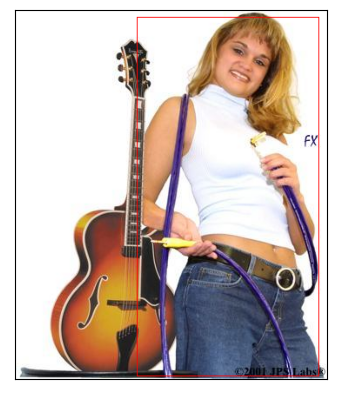

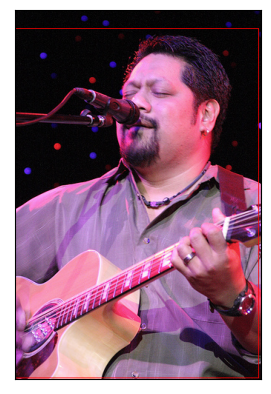

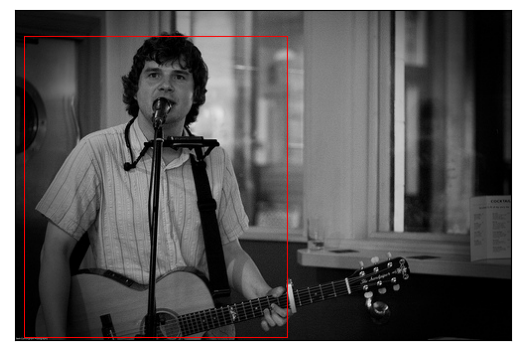

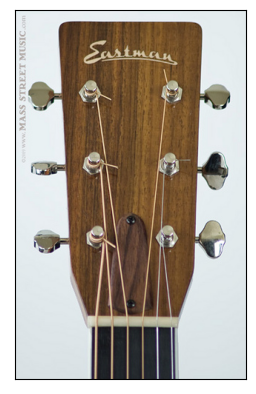

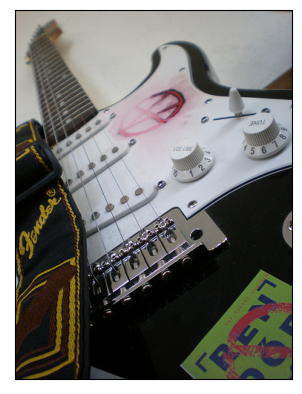

In [141]:
score_threshold = .90

for ii, fn in enumerate(fn_list):
    
    inds = np.where((out[ii]['labels']==categ_num) & (out[ii]['scores']>score_threshold))[0]

    boxes = out[ii]['boxes'][inds]

    img = read_image(fn)
    drawn_boxes = draw_bounding_boxes(img, boxes, colors="red")
    show(drawn_boxes)

In [85]:
out[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [142]:
categ_names

['__background__',
 'person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'N/A',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'N/A',
 'backpack',
 'umbrella',
 'N/A',
 'N/A',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'N/A',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'N/A',
 'dining table',
 'N/A',
 'N/A',
 'toilet',
 'N/A',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'N/A',
 'book',
 'clock',
 'vase',
 'scissors',
 'ted

In [125]:
score_threshold = .90

In [113]:
categ_names = weights.meta["categories"]

In [114]:
categ_num = np.where(['person' in c for c in categ_names])[0][0]

In [126]:
ii = 0;

inds = np.where((out[ii]['labels']==categ_num) & (out[ii]['scores']>score_threshold))[0]
inds

array([0, 1])

In [127]:
out[ii]['scores'][inds]

tensor([0.9978, 0.9925], grad_fn=<IndexBackward0>)

In [128]:
out[ii]['boxes'][inds]

tensor([[250.2473,  54.9456, 488.5170, 330.8837],
        [  9.2369,  13.9766, 291.4779, 330.9289]], grad_fn=<IndexBackward0>)

In [129]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

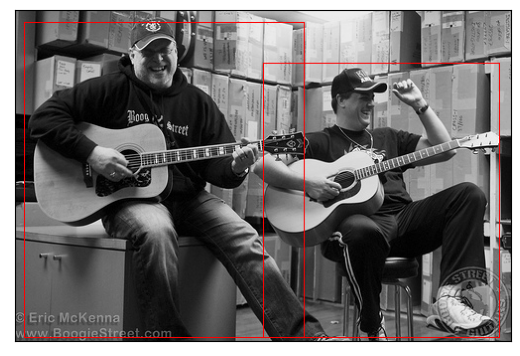

In [130]:
from torchvision.utils import draw_bounding_boxes
from torchvision.io import read_image
import torchvision.transforms.functional as F

boxes = out[ii]['boxes'][inds]

img = read_image(target_image_filename)
drawn_boxes = draw_bounding_boxes(img, boxes, colors="red")
show(drawn_boxes)

In [ ]:
plt.figure()
plt.imshow(im_array)
plt.

In [58]:
out[0]['labels']

tensor([86,  1, 39, 41, 28, 43, 41, 40,  1, 67, 41, 86, 43, 41, 47, 87, 44, 39,
        31, 44, 16, 38, 48,  1, 81, 50, 42,  1, 41, 31, 43, 34, 31, 39, 86, 49,
        87, 51, 41,  2, 37, 40, 90, 16, 46])

In [59]:
out[0]['scores']

tensor([0.9542, 0.8366, 0.8194, 0.7711, 0.3980, 0.3965, 0.3807, 0.3565, 0.3429,
        0.3199, 0.2995, 0.2548, 0.1998, 0.1941, 0.1723, 0.1666, 0.1570, 0.1425,
        0.1337, 0.1334, 0.1174, 0.1143, 0.1084, 0.1022, 0.0949, 0.0925, 0.0888,
        0.0888, 0.0855, 0.0848, 0.0841, 0.0833, 0.0793, 0.0786, 0.0745, 0.0733,
        0.0722, 0.0673, 0.0632, 0.0591, 0.0583, 0.0579, 0.0540, 0.0518, 0.0515],
       grad_fn=<IndexBackward0>)

In [1]:
import os, sys

sys.path.append('/user_data/mmhender/toolboxes/bfjdet/')
sys.path.append('/user_data/mmhender/toolboxes/bfjdet/lib/')
sys.path.append('/user_data/mmhender/toolboxes/bfjdet/model/')
# sys.path.append('/user_data/mmhender/toolboxes/bfjdet/lib/utils/')

sys.path.insert(0, '/user_data/mmhender/toolboxes/bfjdet/lib/')
sys.path.insert(0, '/user_data/mmhender/toolboxes/bfjdet/model/')

for path in ['/user_data/mmhender/modfit/code', '/user_data/mmhender/modfit']:
    if path in list(sys.path):
        sys.path.remove(path)
        
sys.path

# from tools import test

['/user_data/mmhender/toolboxes/bfjdet/model/',
 '/user_data/mmhender/toolboxes/bfjdet/lib/',
 '/user_data/mmhender/featsynth/code/prep_images',
 '/user_data/mmhender/featsynth/code/prep_images',
 '/opt/anaconda3/lib/python37.zip',
 '/opt/anaconda3/lib/python3.7',
 '/opt/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/home/mmhender/imstat_env/lib/python3.7/site-packages',
 '/home/mmhender/imstat_env/lib/python3.7/site-packages/IPython/extensions',
 '/home/mmhender/.ipython',
 '/user_data/mmhender/toolboxes/bfjdet/',
 '/user_data/mmhender/toolboxes/bfjdet/lib/',
 '/user_data/mmhender/toolboxes/bfjdet/model/']

In [5]:
from lib import utils as utils
utils

<module 'lib.utils' (namespace)>

In [9]:
import utils

In [10]:
utils

<module 'utils' from '/home/mmhender/imstat_env/lib/python3.7/site-packages/utils/__init__.py'>

In [8]:
import misc_utils

ModuleNotFoundError: No module named 'misc_utils'

In [7]:
utils.misc_utils

AttributeError: module 'lib.utils' has no attribute 'misc_utils'

In [2]:
sys.path

['../model',
 '../lib',
 '/user_data/mmhender/toolboxes/bfjdet/model/',
 '/user_data/mmhender/toolboxes/bfjdet/lib/',
 '/user_data/mmhender/featsynth/code/prep_images',
 '/user_data/mmhender/featsynth/code/prep_images',
 '/opt/anaconda3/lib/python37.zip',
 '/opt/anaconda3/lib/python3.7',
 '/opt/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/home/mmhender/imstat_env/lib/python3.7/site-packages',
 '/home/mmhender/imstat_env/lib/python3.7/site-packages/IPython/extensions',
 '/home/mmhender/.ipython',
 '/user_data/mmhender/toolboxes/bfjdet/',
 '/user_data/mmhender/toolboxes/bfjdet/lib/',
 '/user_data/mmhender/toolboxes/bfjdet/model/']

In [9]:
from tools import test

ImportError: cannot import name 'misc_utils' from 'utils' (/user_data/mmhender/modfit/code/utils/__init__.py)

In [1]:
sys.path.insert(0, '/user_data/mmhender/toolboxes/bfjdet/')
sys.path.insert(0, '/user_data/mmhender/toolboxes/bfjdet/lib/')
sys.path.insert(0, '/user_data/mmhender/toolboxes/bfjdet/model/')
sys.path.insert(0, '/user_data/mmhender/toolboxes/bfjdet/lib/utils/')

from tools import test

/home/mmhender/imstat_env/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: cannot import name 'misc_utils' from 'utils' (/user_data/mmhender/modfit/code/utils/__init__.py)

In [3]:
sys.path

['../model',
 '../lib',
 '/user_data/mmhender/toolboxes/bfjdet/lib/utils/',
 '/user_data/mmhender/toolboxes/bfjdet/model/',
 '/user_data/mmhender/toolboxes/bfjdet/lib/',
 '/user_data/mmhender/toolboxes/bfjdet/',
 '/user_data/mmhender/featsynth/code/prep_images',
 '/user_data/mmhender/featsynth/code/prep_images',
 '/user_data/mmhender/modfit/code',
 '/opt/anaconda3/lib/python37.zip',
 '/opt/anaconda3/lib/python3.7',
 '/opt/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/home/mmhender/imstat_env/lib/python3.7/site-packages',
 '/home/mmhender/imstat_env/lib/python3.7/site-packages/IPython/extensions',
 '/home/mmhender/.ipython',
 '/user_data/mmhender/toolboxes/bfjdet/',
 '/user_data/mmhender/toolboxes/bfjdet/lib/',
 '/user_data/mmhender/toolboxes/bfjdet/model/',
 '/user_data/mmhender/toolboxes/bfjdet/lib/utils/',
 '/user_data/mmhender/modfit']

In [7]:
cd '/user_data/mmhender/toolboxes/bfjdet/lib/utils/'

/user_data/mmhender/toolboxes/bfjdet/lib/utils


In [8]:
ls

misc_utils.py  nms_utils.py  SGD_bias.py  visual_utils.py
